<a href="https://colab.research.google.com/github/CodeCraftTejas/Books-Price-Monitoring-and-Sentiment-Analysis/blob/main/FINAL_PIP_Project(Tejas).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.** **BOOKS PRICE MONITORING** WITH INTERACTIVE MENU-DRIVEN CHOICES ABOUT THE SCRAPED SITE

In [ ]:
pip install beautifulsoup4 requests pandas schedule

In [ ]:
#import necessary libraries
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
sample_page_link='http://books.toscrape.com/catalogue/a-light-in-the-attic_1000/index.html'

In [ ]:
import bs4
book_soup=bs4.BeautifulSoup(requests.get(sample_page_link).text)
book_soup

<!DOCTYPE html>
<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]--><!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]--><!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]--><!--[if gt IE 8]><!--><html class="no-js" lang="en-us"> <!--<![endif]-->
<head>
<title>
    A Light in the Attic | Books to Scrape - Sandbox
</title>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="24th Jun 2016 09:29" name="created"/>
<meta content="
    It's hard to imagine a world without A Light in the Attic. This now-classic collection of poetry and drawings from Shel Silverstein celebrates its 20th anniversary with this special edition. Silverstein's humorous and creative verse can amuse the dowdiest of readers. Lemon-faced adults and fidgety kids sit still and read these rhythmic words and laugh and smile and love th It's hard to imagine a world without A Light in the Attic. This now

In [ ]:
book_soup.select_one('table.table')

<table class="table table-striped">
<tr>
<th>UPC</th><td>a897fe39b1053632</td>
</tr>
<tr>
<th>Product Type</th><td>Books</td>
</tr>
<tr>
<th>Price (excl. tax)</th><td>Â£51.77</td>
</tr>
<tr>
<th>Price (incl. tax)</th><td>Â£51.77</td>
</tr>
<tr>
<th>Tax</th><td>Â£0.00</td>
</tr>
<tr>
<th>Availability</th>
<td>In stock (22 available)</td>
</tr>
<tr>
<th>Number of reviews</th>
<td>0</td>
</tr>
</table>

In [ ]:
import pandas as pd
pd.read_html(str(book_soup.select_one('table.table')))[0].set_index(0)

<ipython-input-6-24a3f2cb38c2>:2: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  pd.read_html(str(book_soup.select_one('table.table')))[0].set_index(0)


,1
0,
UPC,a897fe39b1053632
Product Type,Books
Price (excl. tax),Â£51.77
Price (incl. tax),Â£51.77
Tax,Â£0.00
Availability,In stock (22 available)
Number of reviews,0


In [ ]:
# Function to scrape book data
def scrape_books():
    url = "http://books.toscrape.com/"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

    # Extract book titles and prices
    books = []
    for book in soup.find_all("article", class_="product_pod"):
        title = book.h3.a["title"]
        price = book.find("p", class_="price_color").text.strip("£")
        price = price.replace('£','').replace("Â", "")
        books.append({"Title": title, "Price": float(price)})

    # Save to CSV
    df = pd.DataFrame(books)
    df.to_csv("books_data.csv", index=False)
    print("Scraping complete! Data saved to books_data.csv.")
    print(df)

In [ ]:
# Function to visualize the data
def visualize_data():
    try:
        df = pd.read_csv('books_data.csv')
        if df.empty:
            print("\nNo data to visualize. Please scrape the data first.")
            return

        # Scatterplot for Book Prices
        plt.figure(figsize=(20, 12))
        plt.scatter(df["Title"], df["Price"], color="blue", alpha=0.7)
        plt.xlabel("Book Title", fontsize=12)
        plt.ylabel("Price (£)", fontsize=12)
        plt.title("Scatterplot of Book Prices", fontsize=14)
        plt.xticks(rotation=45, ha="right", fontsize=8)
        plt.tight_layout()
        plt.show()

        # Histogram for Price Distribution
        plt.figure(figsize=(8, 6))
        plt.hist(df["Price"], bins=10, color="lightgreen", edgecolor="black")
        plt.xlabel("Price (£)", fontsize=12)
        plt.ylabel("Frequency", fontsize=12)
        plt.title("Price Distribution of All Books", fontsize=14)
        plt.tight_layout()
        plt.show()

    except FileNotFoundError:
        print("\nNo data found! Please scrape the data first.")

In [ ]:
#Function to search for a specific book and see prices
def search_product():
    try:
        df = pd.read_csv('books_data.csv')
        keyword = input("\nEnter keyword to search for in product titles: ").lower()
        filtered_df = df[df["Title"].str.contains(keyword, case=False)]
        if filtered_df.empty:
            print("\nNo products found with the given keyword.")
        else:
            print("\nSearch Results:")
            print(filtered_df)
    except FileNotFoundError:
        print("\nNo data found! Please scrape the data first.")

In [ ]:
# Function to set price alert
def set_price_alert():
    try:
        df = pd.read_csv('books_data.csv')
        threshold = float(input("\nEnter price threshold (£): "))
        filtered_df = df[df["Price"] <= threshold]
        if filtered_df.empty:
            print(f"\nNo products found below £{threshold}.")
        else:
            print(f"\nProducts below £{threshold}:")
            print(filtered_df)
    except FileNotFoundError:
        print("\nNo data found! Please scrape the data first.")
    except ValueError:
        print("\nInvalid input. Please enter a numeric value for the price threshold.")

In [ ]:
# Function to generate summary of book
import textwrap
def book_summary():
    url = "http://books.toscrape.com/"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

    # Fetch all book links
    book_page_links = list(soup.select('ol.row article.product_pod h3 a'))

    # Display available books with indices
    print("\n--- Available Books ---")
    for idx, book_link in enumerate(book_page_links):
        title = book_link['title']  # Book title is stored in the 'title' attribute
        print(f"{idx}: {title}")

    try:
        # Ask the user to select a book by index
        selected_index = int(input("\nEnter the index of the book to fetch its summary: "))

        if 0 <= selected_index < len(book_page_links):
            # Construct the URL for the selected book
            sample_page_link = url + book_page_links[selected_index]['href']

            # Fetch and parse the selected book's page
            book_response = requests.get(sample_page_link)
            book_soup = BeautifulSoup(book_response.text, "html.parser")

            # Extract book details
            book_title = book_soup.find("h1").text
            price = book_soup.find("p", class_="price_color").text.strip()

            # Extract the product description
            try:
                summary = book_soup.select_one('#product_description + p').text.strip()
            except AttributeError:
                summary = "Summary not available."

            # Display the book details
            print("\n--- Book Summary ---")
            paragraph=textwrap.fill(summary, width=80)
            print(paragraph)
        else:
            print("Invalid index! Please enter a valid number from the list.")

    except ValueError:
        print("Invalid input! Please enter a number.")

In [ ]:
# Function to generate report
def generate_report():
    try:
        df = pd.read_csv('books_data.csv')
        report_filename = "price_monitoring_report.xlsx"
        df.to_excel(report_filename, index=False)
        print(f"\nReport generated and saved as {report_filename}.")
        print("\n--- Report Preview ---")
        print(df.to_string(index=False))
    except FileNotFoundError:
        print("\nNo data found! Please scrape the data first.")

In [ ]:
# Function to monitor price updates (placeholder)
def monitor_price_updates():
    print("\nThis feature is under development. Periodic scraping and real-time updates will be implemented here.")


--- Price Monitoring Platform ---
1. Scrape product data
2. Visualize data (Bar Graph & Histogram)
3. Search product by keyword
4. Set price alert
5. Fetch Book Summary
6. Generate report
7. Monitor price updates (Real-time)
8. Exit
Enter your choice (1/2/3/4/5/6/7/8): 1
Scraping complete! Data saved to books_data.csv.
                                                Title  Price
0                                A Light in the Attic  51.77
1                                  Tipping the Velvet  53.74
2                                          Soumission  50.10
3                                       Sharp Objects  47.82
4               Sapiens: A Brief History of Humankind  54.23
5                                     The Requiem Red  22.65
6   The Dirty Little Secrets of Getting Your Dream...  33.34
7   The Coming Woman: A Novel Based on the Life of...  17.93
8   The Boys in the Boat: Nine Americans and Their...  22.60
9                                     The Black Maria  52.15
10     

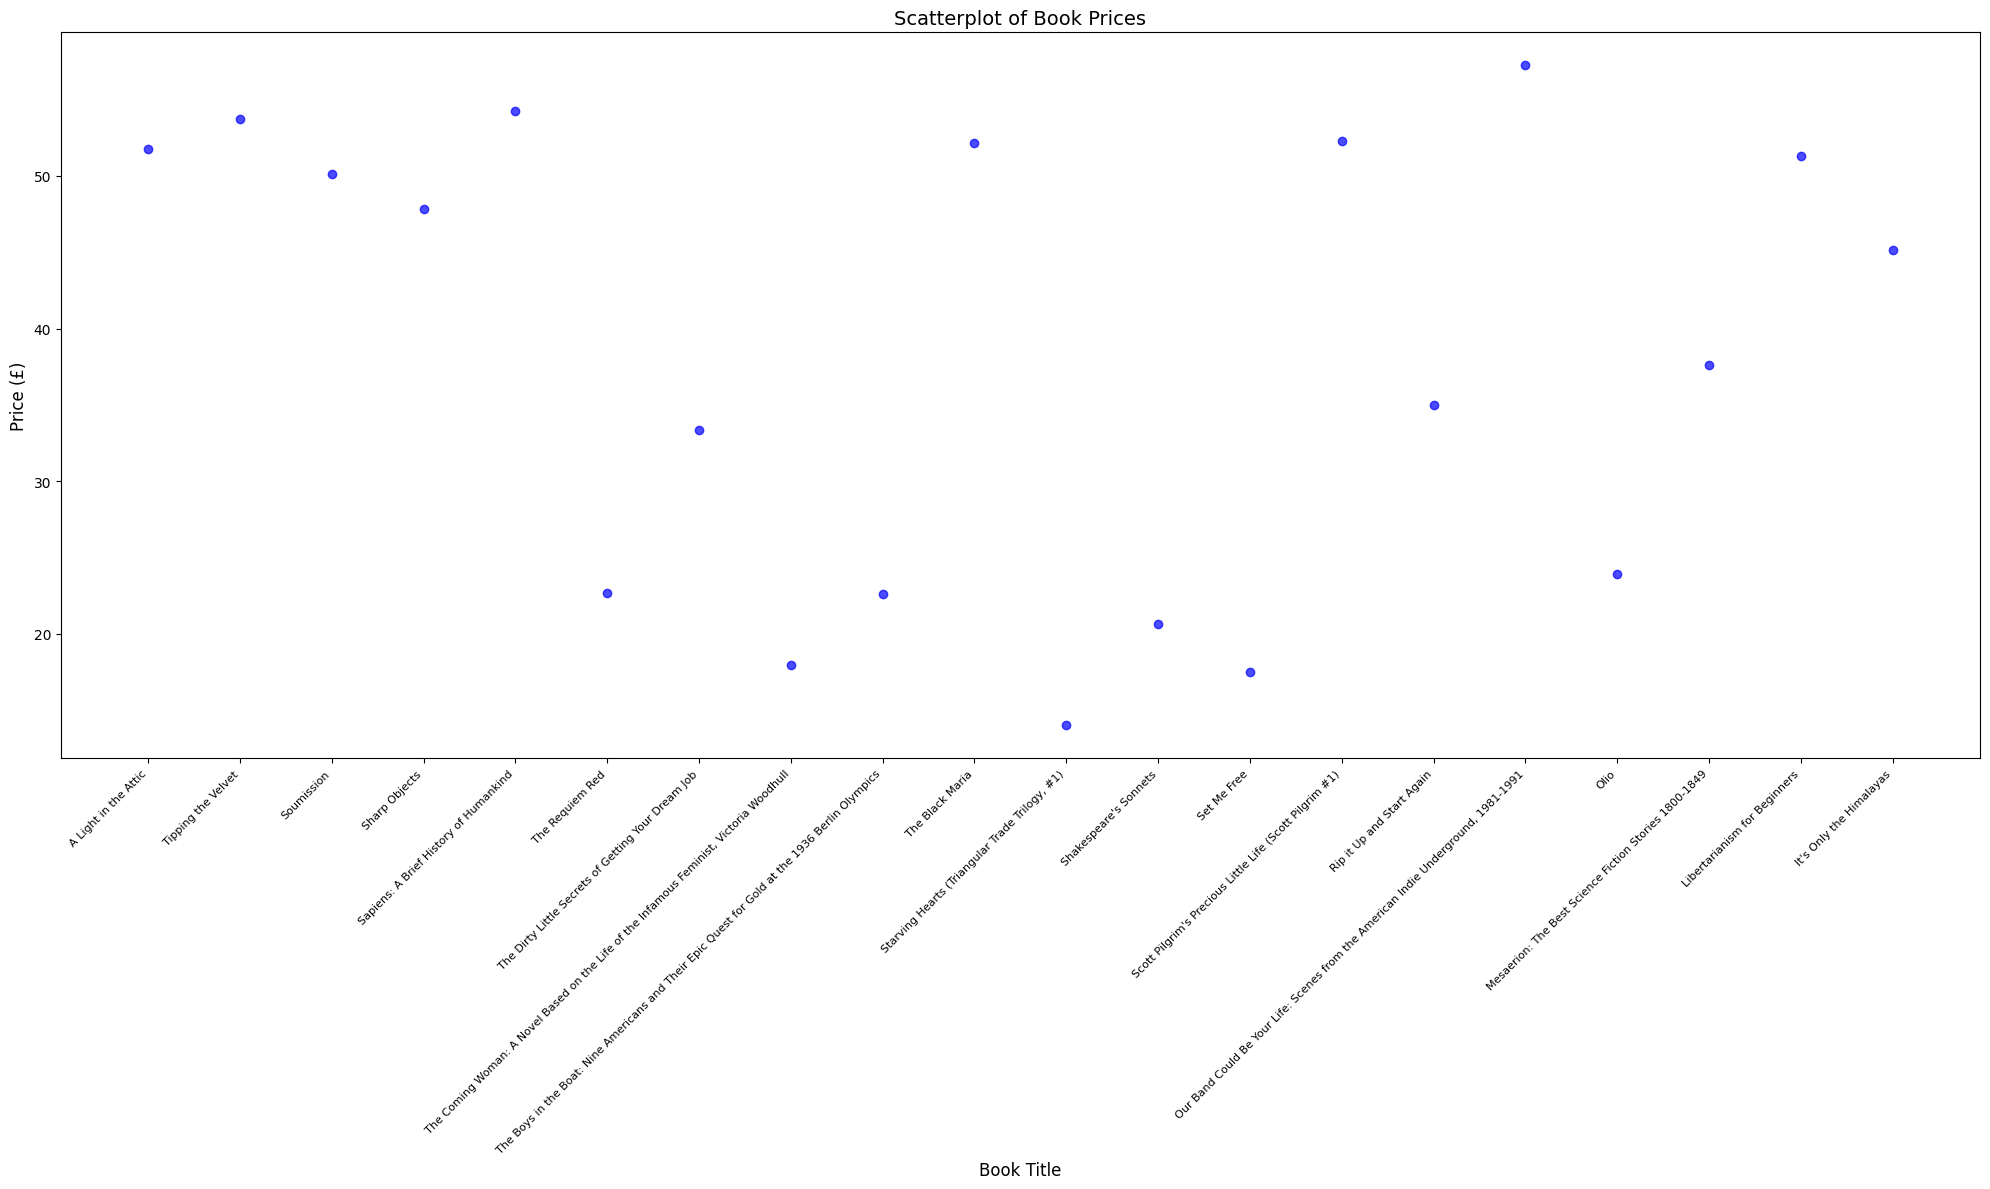

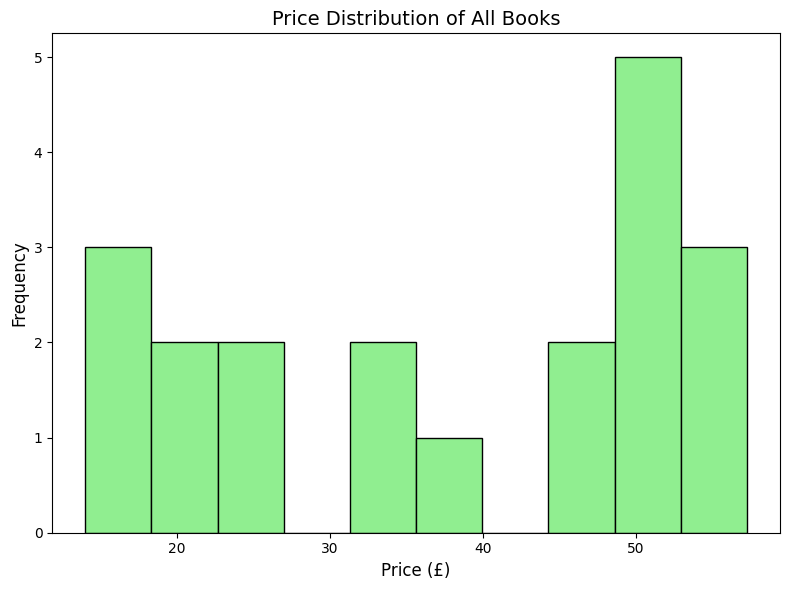


--- Price Monitoring Platform ---
1. Scrape product data
2. Visualize data (Bar Graph & Histogram)
3. Search product by keyword
4. Set price alert
5. Fetch Book Summary
6. Generate report
7. Monitor price updates (Real-time)
8. Exit
Enter your choice (1/2/3/4/5/6/7/8): 3

Enter keyword to search for in product titles: Set Me Free

Search Results:
          Title  Price
12  Set Me Free  17.46

--- Price Monitoring Platform ---
1. Scrape product data
2. Visualize data (Bar Graph & Histogram)
3. Search product by keyword
4. Set price alert
5. Fetch Book Summary
6. Generate report
7. Monitor price updates (Real-time)
8. Exit
Enter your choice (1/2/3/4/5/6/7/8): 4

Enter price threshold (£): 15

Products below £15.0:
                                             Title  Price
10  Starving Hearts (Triangular Trade Trilogy, #1)  13.99

--- Price Monitoring Platform ---
1. Scrape product data
2. Visualize data (Bar Graph & Histogram)
3. Search product by keyword
4. Set price alert
5. Fetch Book

In [ ]:
# Menu for user interaction
def main_menu():
    while True:
        print("\n--- Price Monitoring Platform ---")
        print("1. Scrape product data")
        print("2. Visualize data (Bar Graph & Histogram)")
        print("3. Search product by keyword")
        print("4. Set price alert")
        print("5. Fetch Book Summary")
        print("6. Generate report")
        print("7. Monitor price updates (Real-time)")
        print("8. Exit")

        choice = input("Enter your choice (1/2/3/4/5/6/7/8): ")

        if choice == "1":
            scrape_books()
        elif choice == "2":
            visualize_data()
        elif choice == "3":
            search_product()
        elif choice == "4":
            set_price_alert()
        elif choice == "5":
            book_summary()
        elif choice == "6":
            generate_report()
        elif choice == "7":
            monitor_price_updates()
        elif choice == "8":
            print("Exiting program. Goodbye!")
            break
        else:
            print("Invalid choice! Please enter a number between 1 and 8.")

# Run the program
if __name__ == "__main__":
    main_menu()

**2.** **SENTIMENT ANALYSIS** BASED ON RATINGS AND REVIEWS FROM USERS ABOUT BOOKS

In [ ]:
# Base URL of Books.toscrape website
BASE_URL = "https://books.toscrape.com/catalogue/page-{}.html"

# Mapping text ratings to numbers
rating_map = {"One": 1, "Two": 2, "Three": 3, "Four": 4, "Five": 5}

# Function to scrape all books from the website
def scrape_all_books():
    books = []
    page = 1

    while True:
        url = BASE_URL.format(page)
        response = requests.get(url)

        # If no more pages exist, break the loop
        if response.status_code != 200:
            break

        soup = BeautifulSoup(response.text, "html.parser")
        book_list = soup.find_all("article", class_="product_pod")

        # If no books are found, stop scraping
        if not book_list:
            break

        # Loop through each book entry
        for book in book_list:
            title = book.h3.a["title"].strip()
            rating_class = book.p["class"][1]
            rating = rating_map.get(rating_class, 0)  # Convert text rating to number
            sentiment = rating_to_sentiment(rating)
            books.append({"Title": title, "Rating": rating, "Predicted_Sentiment": sentiment})
        page += 1
    return pd.DataFrame(books)

# Scrape all books
df = scrape_all_books()

# Save to CSV for reference
df.to_csv("books_data.csv", index=False)

print(f"✅ Scraped {len(df)} books!")
print(df.head())  # Display first few books


✅ Scraped 1000 books!
                                   Title  Rating Predicted_Sentiment
0                   A Light in the Attic       3             Neutral
1                     Tipping the Velvet       1            Negative
2                             Soumission       1            Negative
3                          Sharp Objects       4            Positive
4  Sapiens: A Brief History of Humankind       5            Positive


Enter the book title: A Light in the Attic

📖 Book: A Light in the Attic
⭐ Rating: 3/5
📊 Sentiment: Neutral


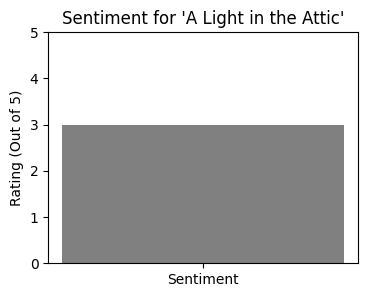

In [ ]:
# Function to assign sentiment based on rating
def rating_to_sentiment(rating):
    if rating >= 4.0:
        return "Positive"
    elif 2.5 <= rating < 4.0:
        return "Neutral"
    else:
        return "Negative"

# Ask user for a book title
user_input = input("Enter the book title: ").strip()

# Search for the book in the scraped data
book_info = df[df["Title"].str.lower() == user_input.lower()]

if not book_info.empty:
    rating = book_info.iloc[0]["Rating"]
    sentiment = rating_to_sentiment(rating)

    print(f"\n📖 Book: {user_input}")
    print(f"⭐ Rating: {rating}/5")
    print(f"📊 Sentiment: {sentiment}")

    # Plot sentiment
    plt.figure(figsize=(4, 3))
    plt.bar(["Sentiment"], [rating], color=["green" if sentiment == "Positive" else "gray" if sentiment == "Neutral" else "red"])
    plt.ylim(0, 5)
    plt.ylabel("Rating (Out of 5)")
    plt.title(f"Sentiment for '{user_input}'")
    plt.show()
else:
    print("❌ Book not found in scraped data. Try a different title.")


In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import random

🎯 Simulated Classification Accuracy: 91.40%


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


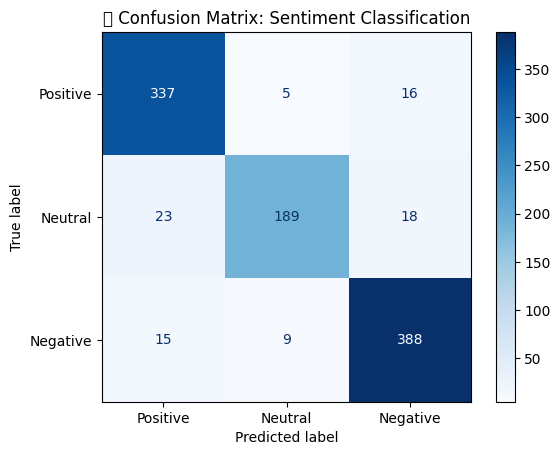

In [ ]:
df["True_Sentiment"] = df["Rating"].apply(lambda r: rating_to_sentiment(r) if random.random() > 0.15 else random.choice(["Positive", "Neutral", "Negative"]))

#Evaluate accuracy
accuracy = accuracy_score(df["True_Sentiment"], df["Predicted_Sentiment"])
accuracy_percent = accuracy * 100
print(f"🎯 Simulated Classification Accuracy: {accuracy_percent:.2f}%")

#Confusion Matrix
cm = confusion_matrix(df["True_Sentiment"], df["Predicted_Sentiment"], labels=["Positive", "Neutral", "Negative"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Positive", "Neutral", "Negative"])
disp.plot(cmap="Blues")
plt.title("📊 Confusion Matrix: Sentiment Classification")
plt.show()

In [ ]:
#MOUNT GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import string
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

In [ ]:
# LOAD DATASET FROM GOOGLE DRIVE
file_path = "/content/drive/MyDrive/Colab Notebooks/Book Reviews.csv"  # Adjust this path
df = pd.read_csv(file_path)


In [ ]:
# DISPLAY SAMPLE DATA
print("🔍 Sample Data:")
print(df.head())


🔍 Sample Data:
   Unnamed: 0                   Book  \
0           0  To Kill a Mockingbird   
1           1  To Kill a Mockingbird   
2           2  To Kill a Mockingbird   
3           3  To Kill a Mockingbird   
4           4  To Kill a Mockingbird   

                                              Review        Review Date  
0  /// gentle reminder that this is not the time ...     March 24, 2022  
1  \n|\n|6.0 stars. I know I am risking a serious...       May 24, 2011  
2  \n|\n|Looking for a new book but don't want to...  December 10, 2020  
3  To Kill a Mockingbird, Harper Lee|To Kill a Mo...       July 1, 2022  
4  Why is it when I pick up | To Kill A Mockingbi...   October 25, 2009  


In [ ]:
print(df.columns)

Index(['Unnamed: 0', 'Book', 'Review', 'Review Date'], dtype='object')


In [ ]:

import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = text.translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    words = nltk.word_tokenize(text)  # Tokenize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words and word.isalpha()]
    return " ".join(words)
df["Cleaned_Review"] = df["Review"].apply(preprocess_text)

# STEP 6: TextBlob Sentiment Labels
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.1:
        return "Positive"
    elif polarity < -0.1:
        return "Negative"
    else:
        return "Neutral"

df["Sentiment"] = df["Review"].apply(get_sentiment)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#TF-IDF with Bigrams
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_features=7000)
X_vect = vectorizer.fit_transform(df["Cleaned_Review"])
y = df["Sentiment"]

#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.2, random_state=42)


In [ ]:
#Train Classifier (Random Forest)
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
#Predict & Evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅Sentiment Classification Accuracy: {accuracy * 100:.2f}%")



✅Sentiment Classification Accuracy: 71.01%


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


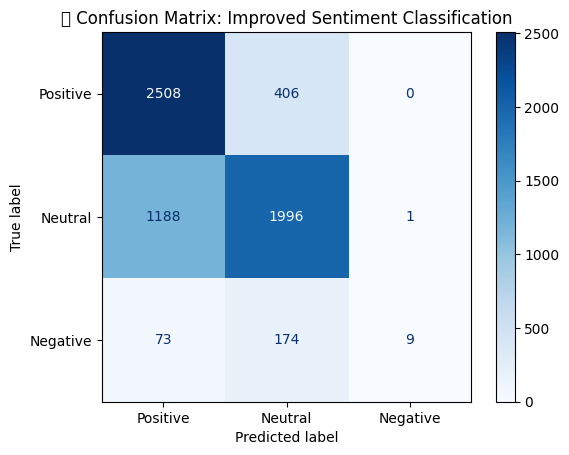

In [ ]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=["Positive", "Neutral", "Negative"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Positive", "Neutral", "Negative"])
disp.plot(cmap="Blues")
plt.title("📊 Confusion Matrix: Improved Sentiment Classification")
plt.show()

In [ ]:
# Choose any index (e.g., 15)
index = 15

# Fetch review and predicted sentiment
original_review = df["Review"].iloc[index]
# Access the 'Sentiment' column instead of 'Predicted_Sentiment'
predicted_sentiment = df["Sentiment"].iloc[index]

# Display
print(f"📝 Original Review:\n{original_review}")
print(f"✅ Predicted Sentiment: {predicted_sentiment}")

📝 Original Review:
“Until I feared I would lose it, I never loved to read. One does not love breathing.”(p. 20)|I love this book and this idea of reading being like breathing. As Scout did, I read early too, and often. Every night before bed I would read and still do. I saw a Twilight Zone Episode once where the main character loved to read and only wanted to be left alone to do so. After falling asleep in the vault of the bank where he worked, he awoke to a post-disaster world where only he was left. He busily gathered together all the books he wanted to read, all organized and stacked up. Just as he chose one to start with, his glasses fell and he stepped on them trying to find them. It was terrible and I remember feeling horrified that this man would never get to read again! Such a thought had never occurred to me. This semester I had to get glasses myself after suffering migraines from reading. I was so nervous at the eye doctor because the thought of not being able to read was too